## **Описание проекта: оценка рисков невозврата кредита**

В вашем распоряжении данные клиентов банка «Скрудж», которые планируют взять кредит. Вам необходимо выяснить, что из имеющихся данных влияет на своевременное погашение кредита и каким именно образом.

Исследование поможет в создании модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

По каждому клиенту есть информация о его семейном положении, образовании, доходе и другие данные. Вам предстоит подготовить данные к анализу и исследовать их, в процессе отвечая на вопросы.

### Описание данных

- `children` — количество детей в семье;
- `days_employed` — сколько дней работает клиент;
- `dob_years` — возраст клиента;
- `education` — уровень образования клиента;
- `education_id` — идентификатор образования клиента;
- `family_status` — семейное положение клиента;
- `family_status_id` — идентификатор семейного положения клиента;
- `gender` — пол клиента;
- `income_type` — тип дохода клиента;
- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;
- `total_income` — ежемесячный доход;
- `purpose` — причина оформления кредита.




## Шаг 1. Откройте файл с данными и изучите общую информацию

1. Загрузите датасет.
2. Сделайте копию датасета.
3. Изучите типы данных и определите, соответствуют ли они содержимому. 
4. Напишите вывод.



In [1]:
# Импортируйте библиотеки для работы
# с таблицами и графиками
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Загрузите датасет в переменную df_raw или другую по вашему выбору.
# Он доступен по адресу <https://code.s3.yandex.net/datasets/credit_scoring_eng.csv>
# а при работе на платформе по адресу /datasets/credit_scoring_eng.csv

df_raw = pd.read_csv('/datasets/credit_scoring_eng.csv')

In [3]:
# При помощи метода .copy() скопируйте датасет
# для работы с ним в переменную df или другую

df = df_raw.copy()

In [4]:
# Изучите общую информацию о датасете

print(df.head())
print(df.describe())
print(df.dtypes)
print(df.info())

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  
0    purchase of the house 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Датафрейм содержит 21525 строк. В столбце days_employed и children есть отрицательные значения, что является некорректным. Много пропущенных значений в колонках days_employed и total_income. 
</div>



## Шаг 2. Выполните предобработку данных




1. Найдите и изучите пропущенные значения в столбцах. 
2. Устраните пропущенные значения: удалите или замените их. 
3. Объясните выбранную стратегию обработки пропущенных значений.



In [5]:
# Место для вашего кода
# Подсчитаем объём данных:
print('Количество строк в датафрейме:', df.shape)

# Подсчитаем количество пропущенных значений:
print('Количество пропущенных значений по столбцам')
print(df.isna().sum())

df_days_employed = df.loc[df['days_employed'].isna(), 'total_income']
print('Количество пропущенных значений в стобце total_income')
print(df_days_employed.isna().sum())

# Заменим значение в days_employed на 0:
df.fillna({'days_employed':0, 'total_income':0}, inplace = True)

print('Количество пропущенных значений по столбцам после замены')
print(df.isna().sum())


Количество строк в датафрейме: (21525, 12)
Количество пропущенных значений по столбцам
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64
Количество пропущенных значений в стобце total_income
2174
Количество пропущенных значений по столбцам после замены
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64



<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Пропуски находятся в колонках days_employed и total_income. Скорее всего, пропущенные значения в days_employed означают, что человек не работал. Их можно заменить на 0. Также у этих столбцов одинаковое количество пропусков. Возможно пропуски находятся в одной строке. Если да, то пропуски в двух столбцах можно заменить на 0.
</div>



1. Изучите уникальные значения в столбцах с уровнем образования (`education`) и полом клиента (`gender`). 
2. Устраните неявные дубликаты и некорректные значения.



In [6]:
# Место для вашего кода
# вывод уникальных значений
print(df['education'].unique())
print(df['gender'].unique())

# единый шрифт для столбца education
df['education']=df['education'].str.lower()

# удаление неверного значения
df = df[df['gender'] != 'XNA']

# проверка
print(df['education'].unique())
print(df['gender'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']
['F' 'M' 'XNA']
["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']
['F' 'M']


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В столбце education есть неявные дубликаты, которые написаны разным шрифтом. В столбце gender есть некорректное значение XNA.
</div>



1. Проверьте наличие дубликатов. Изучите дублированные данные, если они есть, и примите решение — удалять их или оставить.



In [7]:
# Место для вашего кода
# Вывод среза данных строк-дубликатов:
print(df[df.duplicated(keep='first')]) 

       children  days_employed  dob_years            education  education_id  \
2849          0            0.0         41  secondary education             1   
3290          0            0.0         58  secondary education             1   
4182          1            0.0         34    bachelor's degree             0   
4851          0            0.0         60  secondary education             1   
5557          0            0.0         58  secondary education             1   
...         ...            ...        ...                  ...           ...   
20702         0            0.0         64  secondary education             1   
21032         0            0.0         60  secondary education             1   
21132         0            0.0         47  secondary education             1   
21281         1            0.0         30    bachelor's degree             0   
21415         0            0.0         54  secondary education             1   

           family_status  family_status

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Дубликаты есть, но их нужно оставить, т.к у клиентов эти данные могут повторяться.
</div>



## Шаг 3. Выбросы и аномальные значения

Изучите столбцы `total_income`, `dob_age`, `chidlren` на наличие выбросов и аномальных значений, в том числе при помощи графиков. Если выбросы или аномалии будут обнаружены — обоснованно примите решение об их судьбе. Используйте подзаголовки третьего уровня (`### Подзаголовок`), чтобы создать структуру действий в рамках этого шага.



Text(0.5, 1.0, 'children')

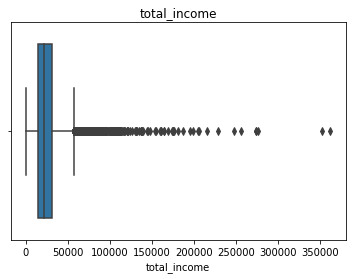

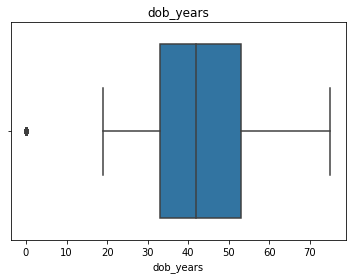

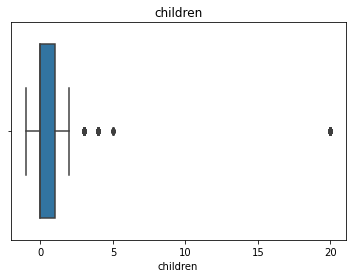

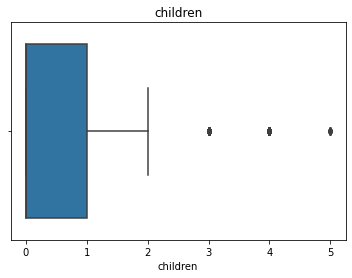

In [8]:
# Место для вашего кода
# построение ящиков с усами
plt.figure()
sns.boxplot(data = df, x = 'total_income')
plt.title('total_income')

plt.figure()
sns.boxplot(data = df, x = 'dob_years')
plt.title('dob_years')

plt.figure()
sns.boxplot(data = df, x = 'children')
plt.title('children')

# удаление аномального значения в столбце 'dob_years'
df = df[df['dob_years'] >= 18]

# удалить значение, где 20 детей и оставить положительные значения
df = df[df['children'] != 20]
df = df[df['children'] >= 0]

plt.figure()
sns.boxplot(data = df, x = 'children')
plt.title('children')

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Доход: Есть очень высокое значение 350000, но оно не является некорректным, т.к клиент может иметь такой доход. 
    Возраст: есть аномально низкое значение, которое необходимо удалить.
    Дети: есть аномально высокое значение 20
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Убрала "" и удалила числовое значение 20, построила график, чтобы проверить.
</div>


## Шаг 4. Добавьте в таблицу новые столбцы




1. **Разделите клиентов на 5 категорий по уровню дохода:**
- Без дохода — люди без работы и с нулевым доходом.
- Очень низкий доход — люди, получающие ниже 14 процентиля от общего распределения дохода.
- Низкий доход — люди, получающие между 14 и 34 процентилями от общего распределения дохода.
- Средний доход — люди, получающие между 34 и 78 процентилями от общего распределения дохода.
- Высокий доход — люди, получающие больше 78 процентиля от общего распределения дохода.



In [9]:
# Место для вашего кода
def income(total_income):
    if total_income <= 0:
        return 'Без дохода'
    elif total_income < df['total_income'].quantile(0.14):
        return 'Очень низкий доход'
    elif total_income <= df['total_income'].quantile(0.34):
        return 'Низкий доход'
    elif total_income <= df['total_income'].quantile(0.78):
        return 'Средний доход'
    elif total_income >= df['total_income'].quantile(0.78):
        return 'Высокий доход'

# Создадим новый столбец с категориями дохода:
df['income_category'] = df['total_income'].apply(income)

print(df['income_category'].value_counts(normalize=True))

Средний доход         0.439979
Высокий доход         0.219990
Низкий доход          0.199991
Без дохода            0.101028
Очень низкий доход    0.039012
Name: income_category, dtype: float64



1. Разделите клиентов на две категории по возрасту: до 40 лет и после. Сохраните результат в колонке `age_category`.



In [10]:
# Место для вашего кода
def age(dob_years):
    if dob_years < 40:
        return 'до 40 лет'
    elif dob_years >= 40:
        return 'после 40 лет'

# Создадим новый столбец с категориями дохода:
df['age_category'] = df['dob_years'].apply(age)

print(df['age_category'].value_counts(normalize=True))

после 40 лет    0.586639
до 40 лет       0.413361
Name: age_category, dtype: float64



1. Разделите клиентов на несколько категорий по количеству детей: без детей, от одного до двух, от трёх и больше. Сохраните результат в колонке `childrens_category`.



In [11]:
# Место для вашего кода
# названия категорий
cat_names = ['без детей', 'от одного до двух', 'от трёх и больше']
bins = [-1, 0, 2, float('inf')]
df['childrens_category'] = pd.cut(df['children'], bins=bins, labels=cat_names)
print(df['childrens_category'].value_counts(normalize=True))

без детей            0.660955
от одного до двух    0.321299
от трёх и больше     0.017746
Name: childrens_category, dtype: float64



## Шаг 5. Проведите исследовательский анализ данных




Задайте структуру наиболее объёмной части исследования. Исследуйте факторы: `Уровень дохода`, `Образование`, `Возраст`, `Количество детей`. Отличается ли распределение между должниками и нет? Исследуйте вопрос графически. Постройте сводную таблицу по каждому фактору и покажите, как часто встречаются должники в каждой группе клиентов. Выберите подходящую визуализацию и сравните 2 группы.



age_category        до 40 лет  после 40 лет
income_category                            
Без дохода                 86            84
Высокий доход             159           169
Низкий доход              180           172
Очень низкий доход         20            30
Средний доход             452           372
age_category         до 40 лет  после 40 лет
education                                   
bachelor's degree          154           123
graduate degree              0             0
primary education           19            12
secondary education        675           673
some college                49            19
age_category        до 40 лет  после 40 лет
childrens_category                         
без детей                 434           624
от одного до двух         441           194
от трёх и больше           22             9


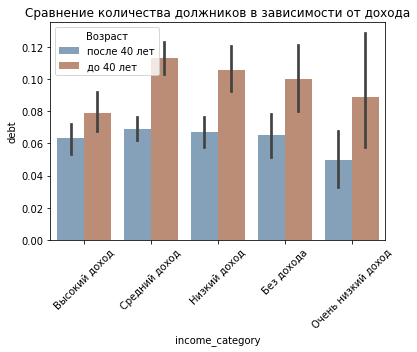

Вывод: люди после 40 лет реже имеют просрочки по кредиту. У людей с низким доходом сильно отличается
    количество долгов по возрасту. Больше всего просрочек у людей со средним доходом всех возрастов.


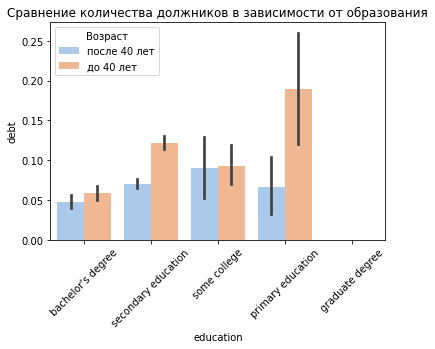

Вывод: люди с ученой степенью не имеют просрочек по кредиту. Самое высокое количество долгов у людей 
до 40 лет с начальным и средним образованием.


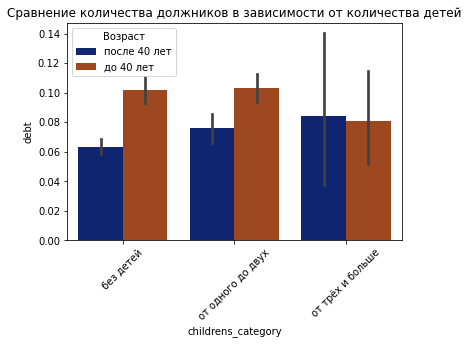

Вывод: самый маленький показатель по долгам у тех, кто старше 40 лет и не имеет детей. 
У людей до 40 лет, кто без детей или имеет 1-2 ребенка количество должников не сильно отличается.


In [12]:
# Место для вашего кода
# Сводные таблицы по доходу, образованию, детям
df_pivot_income = df.pivot_table(index='income_category',
               columns='age_category',      # Строки сводной таблицы
               values='debt', # То, что будет агрегироваться
               aggfunc='sum') # Агрегирующая функция  
print(df_pivot_income)

df_pivot_education = df.pivot_table(index='education',
               columns='age_category',      # Строки сводной таблицы
               values='debt', # То, что будет агрегироваться
               aggfunc='sum') # Агрегирующая функция  
print(df_pivot_education)

df_pivot_child = df.pivot_table(index='childrens_category',
               columns='age_category',      # Строки сводной таблицы
               values='debt', # То, что будет агрегироваться
               aggfunc='sum') # Агрегирующая функция  
print(df_pivot_child)

plt.figure()
sns.barplot(data = df, x = 'income_category', y = 'debt', palette = 'twilight_shifted', hue = 'age_category')
plt.title('Сравнение количества должников в зависимости от дохода')
plt.legend(title='Возраст', loc='upper left')
plt.xticks(rotation=45)
plt.show()

print("""Вывод: люди после 40 лет реже имеют просрочки по кредиту. У людей с низким доходом сильно отличается
    количество долгов по возрасту. Больше всего просрочек у людей со средним доходом всех возрастов.""")

plt.figure()
sns.barplot(data = df, x = 'education', y = 'debt', palette = 'pastel', hue = 'age_category')
plt.title('Сравнение количества должников в зависимости от образования')
plt.legend(title='Возраст', loc='upper left')
plt.xticks(rotation=45)
plt.show()

print("""Вывод: люди с ученой степенью не имеют просрочек по кредиту. Самое высокое количество долгов у людей 
до 40 лет с начальным и средним образованием.""")

plt.figure()
sns.barplot(data = df, x = 'childrens_category', y = 'debt', palette = 'dark', hue = 'age_category')
plt.title('Сравнение количества должников в зависимости от количества детей')
plt.legend(title='Возраст', loc='upper left')
plt.xticks(rotation=45)
plt.show()

print("""Вывод: самый маленький показатель по долгам у тех, кто старше 40 лет и не имеет детей. 
У людей до 40 лет, кто без детей или имеет 1-2 ребенка количество должников не сильно отличается.""")


***Проверьте исследовательскую гипотезу***: у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.



In [13]:
# Количество клиентов без детей с долгом
part_no_child = df.query('childrens_category == "без детей" and debt == 1').shape[0] / df.query('childrens_category == "без детей"').shape[0]

# Количество клиентов с долгом 1-2 детей
part_one_two = df.query('childrens_category == "от одного до двух" and debt == 1').shape[0] / df.query('childrens_category == "от одного до двух"').shape[0]

# Количество клиентов с долгом 3 и больше детей
part_three_more = df.query('childrens_category == "от трёх и больше" and debt == 1').shape[0] / df.query('childrens_category == "от трёх и больше"').shape[0]

# Новый DataFrame с рассчитанными долями должников
df_debt_ratios = pd.DataFrame({
    'childrens_category': ['без детей', 'от одного до двух', 'от трёх и больше'],
    'debt_ratio': [part_no_child, part_one_two, part_three_more]
})

# Создание сводной таблицы
df_pivot_child = df_debt_ratios.pivot_table(
    index='childrens_category',
    values='debt_ratio'
)
print(df_pivot_child)

                    debt_ratio
childrens_category            
без детей             0.075147
от одного до двух     0.092782
от трёх и больше      0.082011


<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Посчитала долю по категориям клиентов. Гипотеза не подтверждается, так как у клиентов с детьми большая доля должников. 
</div>


***Проверьте исследовательскую гипотезу***: одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.



In [14]:
# мужчины с низким доходом и семейным статусом 'разведённый', 'незамужний' или 'вдова/вдовец'
df_low_income = df.query('gender == "M" and income_category == "Низкий доход" and family_status in ["divorced", "unmarried", "widow / widower"]')

# мужчины со средним доходом и семейным статусом 'гражданский брак' или 'женат'
df_medium_income = df.query('gender == "M" and income_category == "Средний доход" and family_status in ["civil partnership", "married"]')

# доля должников
part_low_income = df_low_income['debt'].sum() / df_low_income.shape[0]
part_medium_income = df_medium_income['debt'].sum() / df_medium_income.shape[0]

man_df=pd.DataFrame({
        'group': ['Мужчины с низким доходом (разведённый, незамужний, вдова/вдовец)', 
                  'Мужчины со средним доходом (гражданский брак, женат)'],
        'debt_ratio': [part_low_income, part_medium_income]
    })

# Создание сводной таблицы
df_pivot_debt = pd.pivot_table(
    data=man_df,
    index='group',
    values='debt_ratio'
)
print(df_pivot_debt)

                                                    debt_ratio
group                                                         
Мужчины с низким доходом (разведённый, незамужн...    0.158879
Мужчины со средним доходом (гражданский брак, ж...    0.103042


<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> Гипотеза верна, доля одиноких мужчин немного выше.
</div>


## Шаг 6. Напишите общий вывод



<div class="alert alert-info">
<b>Комментарий студента:</b>
    <br> 
    Для построения графиков были выбранные столбчатые диаграммы, чтобы сравнить количество должников по группам. 
Люди после 40 лет реже имеют просрочки по кредиту. У людей с низким доходом сильно отличается
количество долгов по возрасту. Больше всего просрочек у людей со средним доходом всех возрастов. 
Люди с ученой степенью не имеют просрочек по кредиту. Самое высокое количество долгов у людей 
до 40 лет с начальным и средним образованием. Гипотеза про многодетные семьи не подтверждается, так как у клиентов с детьми большая доля должников. Гипотеза про мужчин верна, доля должников среди одиноких мужчин немного выше.
</div>


---